In [4]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from scipy.stats import gaussian_kde
import skimage
import plotly.graph_objects as go

from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from statistics import mode
from matplotlib import transforms
import netCDF4

In [5]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [6]:
#path_to_file = '/DFS-L/DATA/pritchard/gmooers/Raw_Data_Storage/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
path_to_file = '../compressed_data/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
latitudes = np.squeeze(extra_variables.LAT_20s_to_20n.values)
longitudes = np.squeeze(extra_variables.LON_0e_to_360e.values)
new_lons, new_lats = np.meshgrid(longitudes, latitudes)

lat_keys = np.arange(0,22,1)
lat_values = latitudes
lon_keys = np.arange(0,144,1)
lon_values = longitudes

lat_dic = dict(zip(lat_values, lat_keys))
lon_dic = dict(zip(lon_values, lon_keys))

In [7]:
#! cp /DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/Big_Multi_Sim_Lon_Test.npy ../compressed_data

In [8]:
#labels_3 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Mooers_Logbook/Fully_Convolutional_W/Clustering_Routine/Compressed_Data/Precip_Mandt_Method_0K_3312_Z_3.npy")
#lat_test = np.load('/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/Big_Multi_Sim_Lat_Test.npy')
#lon_test = np.load('/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/Big_Multi_Sim_Lon_Test.npy')

In [9]:
labels_3 = np.load("../compressed_data/Precip_Mandt_Method_0K_3312_Z_3.npy")
lat_test = np.load('../compressed_data/Big_Multi_Sim_Lat_Test.npy')
lon_test = np.load('../compressed_data/Big_Multi_Sim_Lon_Test.npy')

In [10]:
FREQUENCY_GEO_MAP_1 = np.zeros(shape=(22,144))
FREQUENCY_GEO_MAP_2 = np.zeros(shape=(22,144))
FREQUENCY_GEO_MAP_3 = np.zeros(shape=(22,144))
for i in range(len(labels_3)):
    if labels_3[i] == 0:
        FREQUENCY_GEO_MAP_1[lat_dic[lat_test[i]],lon_dic[lon_test[i]]] = FREQUENCY_GEO_MAP_1[lat_dic[lat_test[i]],lon_dic[lon_test[i]]] + 1
    if labels_3[i] == 1:
        FREQUENCY_GEO_MAP_2[lat_dic[lat_test[i]],lon_dic[lon_test[i]]] = FREQUENCY_GEO_MAP_2[lat_dic[lat_test[i]],lon_dic[lon_test[i]]] + 1
    if labels_3[i] == 2:
        FREQUENCY_GEO_MAP_3[lat_dic[lat_test[i]],lon_dic[lon_test[i]]] = FREQUENCY_GEO_MAP_3[lat_dic[lat_test[i]],lon_dic[lon_test[i]]] + 1

 

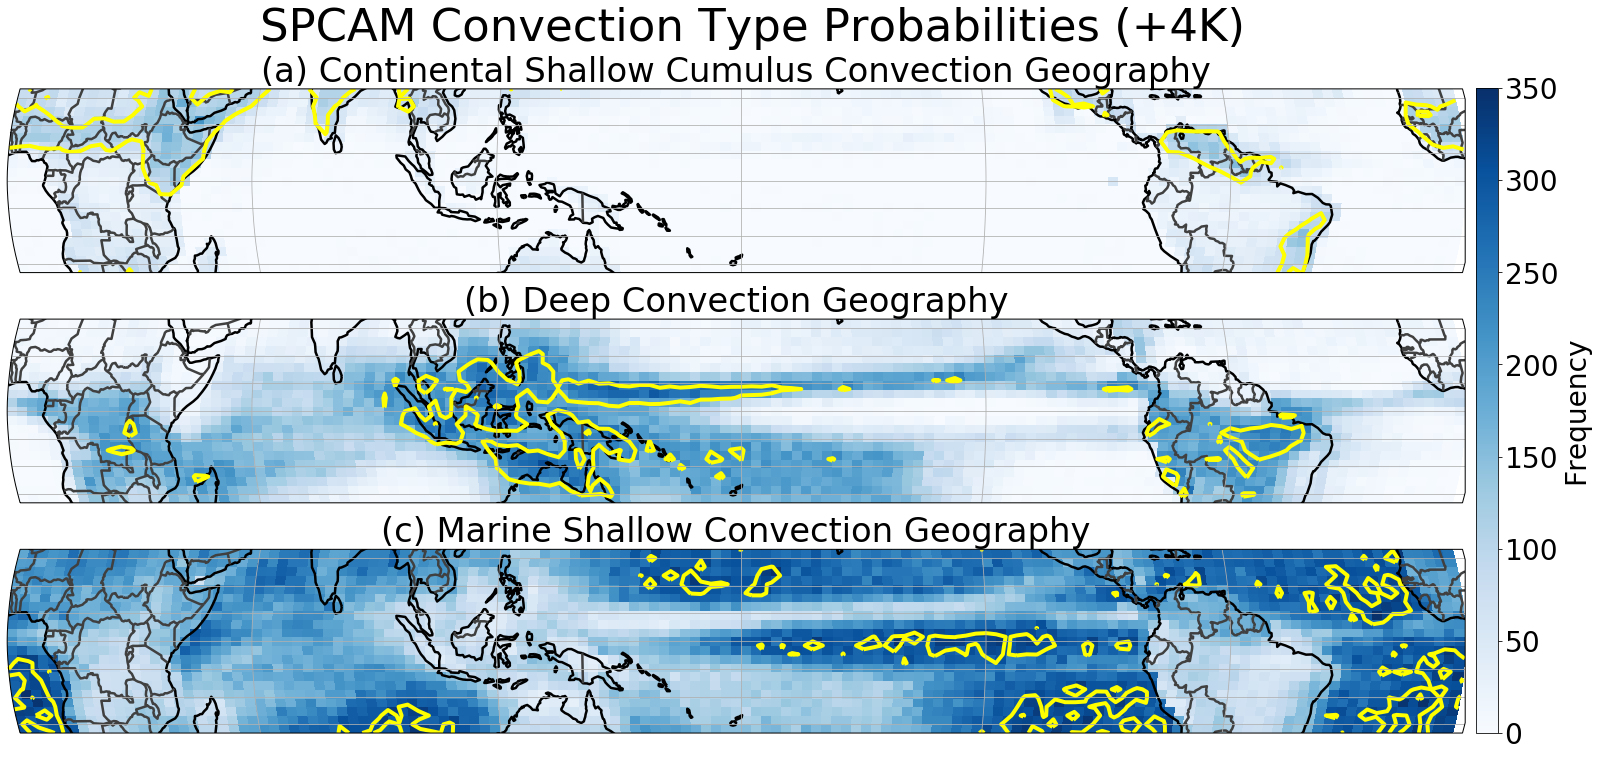

In [19]:
fig, ax = plt.subplots(3,1,figsize=(30,12),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
gs=GridSpec(3,1)

vmin = 0
vmax = 350

contour_plot = ax[0].pcolormesh(new_lons, new_lats, FREQUENCY_GEO_MAP_1, cmap="Blues", transform=ccrs.PlateCarree(), rasterized=True, vmin=vmin, vmax=vmax)
ax[0].contour(new_lons, new_lats, FREQUENCY_GEO_MAP_1, [np.percentile(FREQUENCY_GEO_MAP_1, 92.5)], colors='yellow', linewidths=[4], transform=ccrs.PlateCarree())
ax[0].coastlines(linewidth=2.5,edgecolor='0.25') 
ax[0].gridlines()
ax[0].add_feature(cfeature.BORDERS,linewidth=2.5,edgecolor='0.25')
ax[0].set_title("(a) Continental Shallow Cumulus Convection Geography", fontsize = fz*1.5)

contour_plot = ax[1].pcolormesh(new_lons, new_lats, FREQUENCY_GEO_MAP_2, cmap="Blues", transform=ccrs.PlateCarree(), rasterized=True, vmin=vmin, vmax=vmax)
ax[1].contour(new_lons, new_lats, FREQUENCY_GEO_MAP_2, [np.percentile(FREQUENCY_GEO_MAP_2, 92.5)], colors='yellow', linewidths=[4], transform=ccrs.PlateCarree())
ax[1].coastlines(linewidth=2.5,edgecolor='0.25')
ax[1].gridlines()
ax[1].add_feature(cfeature.BORDERS,linewidth=2.5,edgecolor='0.25')
ax[1].set_title("(b) Deep Convection Geography", fontsize = fz*1.5)

contour_plot = ax[2].pcolormesh(new_lons, new_lats, FREQUENCY_GEO_MAP_3, cmap="Blues", transform=ccrs.PlateCarree(), rasterized=True, vmin=vmin, vmax=vmax)
ax[2].contour(new_lons, new_lats, FREQUENCY_GEO_MAP_3, [np.percentile(FREQUENCY_GEO_MAP_3, 92.5)], colors='yellow', linewidths=[4], transform=ccrs.PlateCarree())
ax[2].coastlines(linewidth=2.5,edgecolor='0.25')
ax[2].gridlines()
ax[2].add_feature(cfeature.BORDERS,linewidth=2.5,edgecolor='0.25')
ax[2].set_title("(c) Marine Shallow Convection Geography", fontsize = fz*1.5)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.13, 0.01, 0.746])
cbar = fig.colorbar(contour_plot, cax=cbar_ax)
cbar.set_label(label='Frequency', fontsize=fz*1.25)
cbar.ax.tick_params(labelsize=fz*1.25) 
cbar.ax.yaxis.get_offset_text().set(size=fz*1.25)

plt.suptitle("SPCAM Convection Type Probabilities (+4K)", y = 0.97, x=0.47, fontsize=fz*2.0)
plt.savefig("../Figures/Figure_S10.png", bbox_inches='tight',pad_inches = 0)
plt.savefig("../Figures/Figure_S10.pdf", bbox_inches='tight',pad_inches = 0)